In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# EDA Function

In [46]:
def visualize_change_heatmap(data, title, years=None):
    """
    Trực quan bằng Heatmap để có cái nhìn tổng quan giữa các quốc gia qua từng năm

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Filter data for heatmap
    heatmap_data = data.set_index("Country")[years]

    # Plot the heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".2f", 
        cmap="Blues", 
        linewidths=0.5, 
    )

    # Customize the plot
    plt.title(title, fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Country", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

In [30]:
def visualize_change_panel_bar_plot(data, title, show_value=True, years=None,):
    """
    Trực quan dữ liệu bằng Panel Bar Plot, so sánh sự khác biệt của các quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """


    if years is None:
        years = [col for col in data.columns if col.isdigit()]
        
    fig, axs = plt.subplots(1, len(years), figsize=(15, 10), sharex=True, sharey=True)
    colors = sns.color_palette('Paired', len(years))
    one_year = True if len(years) == 1 else False
    
    for i, year in enumerate(years):
        value = data[year]
        value.index = data['Country']
        value = value.sort_values()[::-1]
        
        if one_year:
            bars = value.plot(kind='barh', stacked=True, ax=axs, color=colors[i])
            axs.set_ylabel("")
            axs.set_title(f"{year}")
            axs.grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs.spines[spine].set_visible(False)
            axs.tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
            break
        else:
            bars = value.plot(kind='barh', stacked=True, ax=axs[i], color=colors[i])
            axs[i].set_ylabel("")
            axs[i].set_title(f"{year}")
            axs[i].grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs[i].spines[spine].set_visible(False)
            axs[i].tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
                    
    plt.suptitle(title, fontsize=11)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [31]:
def visualize_change_stacked_bar_plot(data,  title, years=None):
    """
    Trực quan dữ liệu bằng Stacked Bar Plot, so sánh sự thay đổi của từng quốc gia qua các năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """


    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Filter the data for the selected countries
    country_list = data['Country']
    filtered_data = data[data['Country'].isin(country_list)]
    
    # Set the country names as the index
    filtered_data.set_index('Country', inplace=True)
    
    # Select only the years to be plotted
    values = filtered_data[years]
    
    # Plot the stacked bar chart
    values.plot(kind='bar', stacked=True, figsize=(20, 8), colormap='Accent')
    
    # Customize the plot
    plt.title(title, fontsize=16)
    plt.ylabel("Indicator", fontsize=14)
    plt.xlabel("Country", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.legend(title="Year", fontsize=12)
    plt.tight_layout()
    plt.show()

In [32]:
def top_k_countries_by_year(data, years=None, k=5):
    """
    Lấy ra top k quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]
    for year in years:
        if year not in data.columns:
            print(f"Year {year} not found in the dataset.")
            continue

        top_k = data.sort_values(by=year, ascending=False).head(k)

        print(f"Top {k} countries for {year}:")
        for _, row in top_k.iterrows():
            print(f"Country: {row['Country']}, Value: {row[year]:.3f}")
        print('-' * 40)

In [33]:
def bottom_k_countries_by_year(data, years=None, k=5):
    """
    Lấy ra bottom k quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]
    for year in years:
        if year not in data.columns:
            print(f"Year {year} not found in the dataset.")
            continue

        bot_k = data.sort_values(by=year, ascending=True).head(k)

        print(f"Bottom {k} countries for {year}:")
        for _, row in bot_k.iterrows():
            print(f"Country: {row['Country']}, Value: {row[year]:.3f}")
        print('-' * 40)

In [34]:
def visualize_top_bottom_k_line_plot(df, k,  years = None):
    """
    Biểu đồ đường trực quan k quốc gia có chỉ số cao nhất và thấp nhất dựa vào giá trị trung bình qua các năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
        k: Số nguyên k>0, số lượng quốc gia thể hiện trên chart
    """
    # Prepare data
    data = df.copy()
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Calculate averages
    data['Average'] = data[years].mean(axis=1)
    top_k = data.nlargest(k, 'Average')
    bottom_k = data.nsmallest(k, 'Average')

    # Identify extremes
    highest_country = data.nlargest(1, 'Average')
    lowest_country = data.nsmallest(1, 'Average')

    # Combine for visualization
    combined = pd.concat([top_k, bottom_k])

    # Setup plot aesthetics
    plt.figure(figsize=(14, 10), dpi=120)
    ax = plt.gca()

    # Plot each country's data
    for _, row in combined.iterrows():
        if row['Country'] in highest_country['Country'].values:
            color = "#2E86C1"  # Highlight color for highest country
            label = f"{row['Country']} (Highest)"
        elif row['Country'] in lowest_country['Country'].values:
            color = "#E74C3C"  # Highlight color for lowest country
            label = f"{row['Country']} (Lowest)"
        else:
            color = "#95A5A6"  # Neutral color for others
            label = row['Country']

        sns.lineplot(x=years, y=row[years].values, label=label, 
                     linewidth=4, color=color, marker='o', ax=ax)

        # Annotate the last year's point
        ax.text(years[-1], row[years].iloc[-1], f" {row['Country']}", 
                fontsize=10, fontweight='bold', color=color, ha='left', va='center')

    # Title and captions
    ax.set_title(f"Top-{k} and Bottom-{k} Countries", 
                 fontsize=16, weight='bold', loc='left', color="#333333")
    ax.set_xlabel("Year", fontsize=12, color="#333333")
    ax.set_ylabel("Indicator Value", fontsize=12, color="#333333")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adjust ticks and remove frame
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xticks(fontsize=10, color="#333333")
    plt.yticks(fontsize=10, color="#333333")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

    plt.tight_layout()
    plt.show()


# EDA

In [35]:
ast = pd.read_csv('../data/preprecessed_data/asian_ast.csv')
ast

,Country,ISO3,Indicator,Unit,2018,2019,2020,2021,2022
0,Armenia,ARM,Temperature change with respect to a baseline ...,Degree Celsius,2.739,1.864,1.954,2.183,1.845
1,Bangladesh,BGD,Temperature change with respect to a baseline ...,Degree Celsius,0.911,1.151,0.934,1.326,1.240
2,Bhutan,BTN,Temperature change with respect to a baseline ...,Degree Celsius,1.221,1.136,1.035,1.648,1.456
3,Brunei Darussalam,BRN,Temperature change with respect to a baseline ...,Degree Celsius,0.903,1.221,1.222,0.972,1.048
4,Cambodia,KHM,Temperature change with respect to a baseline ...,Degree Celsius,0.655,1.370,1.275,0.786,0.886
5,China,CHN,Temperature change with respect to a baseline ...,Degree Celsius,1.375,1.411,1.580,1.656,1.855
6,Cyprus,CYP,Temperature change with respect to a baseline ...,Degree Celsius,2.104,1.496,1.632,1.948,1.179
7,Georgia,GEO,Temperature change with respect to a baseline ...,Degree Celsius,2.514,1.775,2.031,1.757,1.632
8,India,IND,Temperature change with respect to a baseline ...,Degree Celsius,0.881,0.813,0.529,0.734,0.784
9,Indonesia,IDN,Temperature change with respect to a baseline ...,Degree Celsius,0.846,1.026,1.192,0.992,0.957


In [36]:
ast['Indicator'].value_counts()

Indicator
Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980    41
Name: count, dtype: int64

Bộ dữ liệu này chỉ có 1 chỉ số duy nhất là sự thay đổi nhiệt độ trung bình của bề mặt so với chuẩn trong khoảng năm 1951-1980

In [37]:
ast.describe()

,2018,2019,2020,2021,2022
count,41.000000,41.000000,41.000000,41.000000,41.000000
mean,1.374073,1.423805,1.455073,1.512756,1.461268
std,0.662857,0.353654,0.481906,0.514760,0.545088
min,0.333000,0.443000,0.059000,0.428000,0.559000
25%,0.881000,1.223000,1.275000,1.078000,1.014000
50%,1.155000,1.447000,1.474000,1.509000,1.345000
75%,2.065000,1.679000,1.682000,1.920000,1.677000
max,2.739000,2.014000,2.800000,2.661000,2.665000


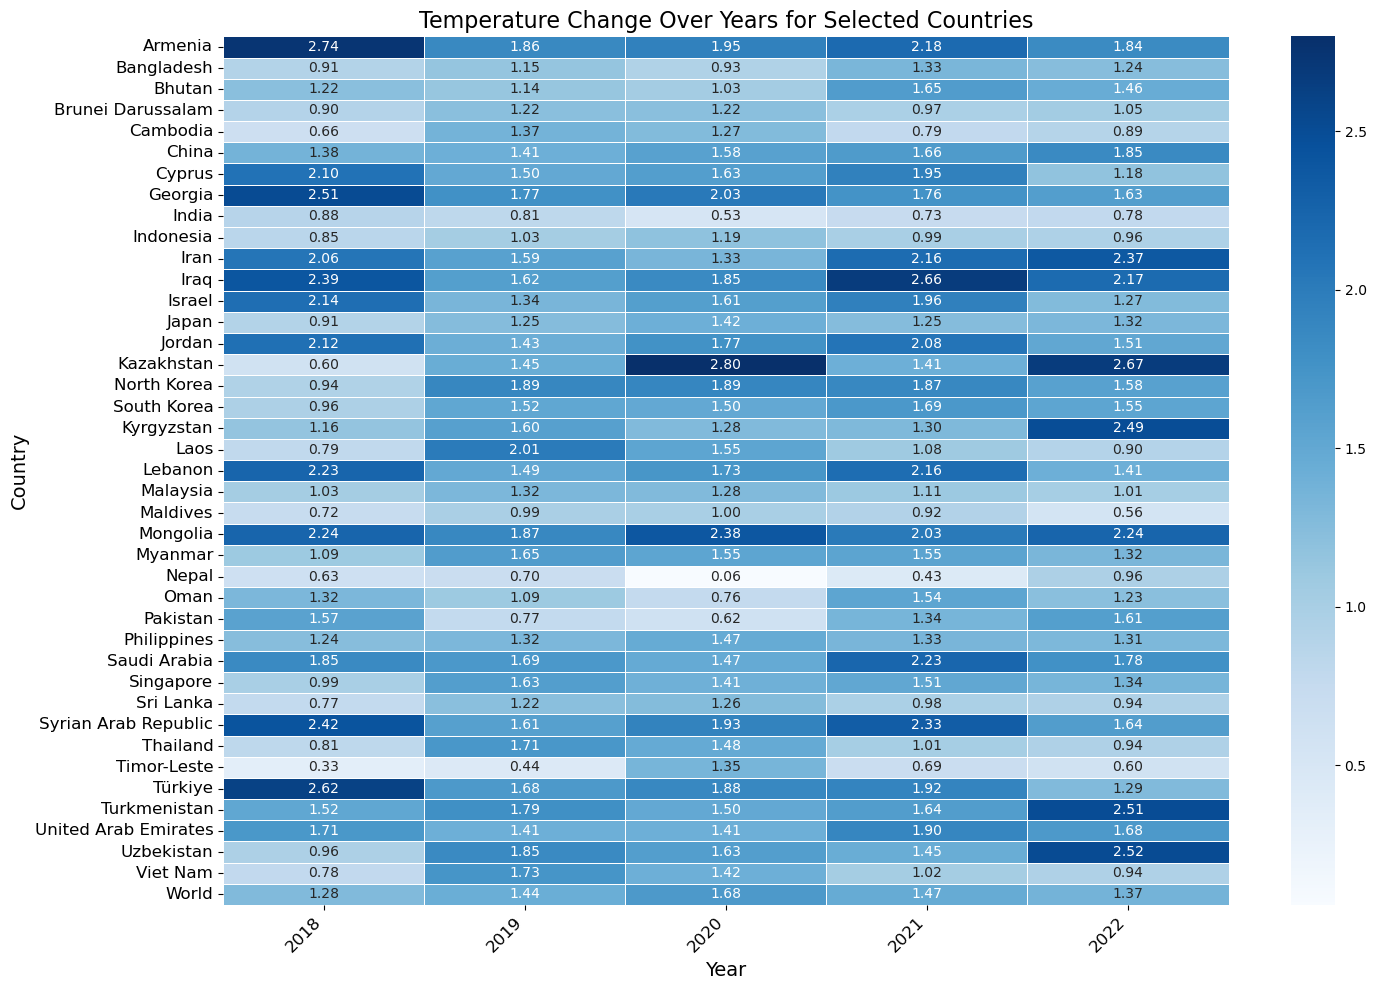

In [47]:
title = "Temperature Change Over Years for Selected Countries"
visualize_change_heatmap(ast, title)

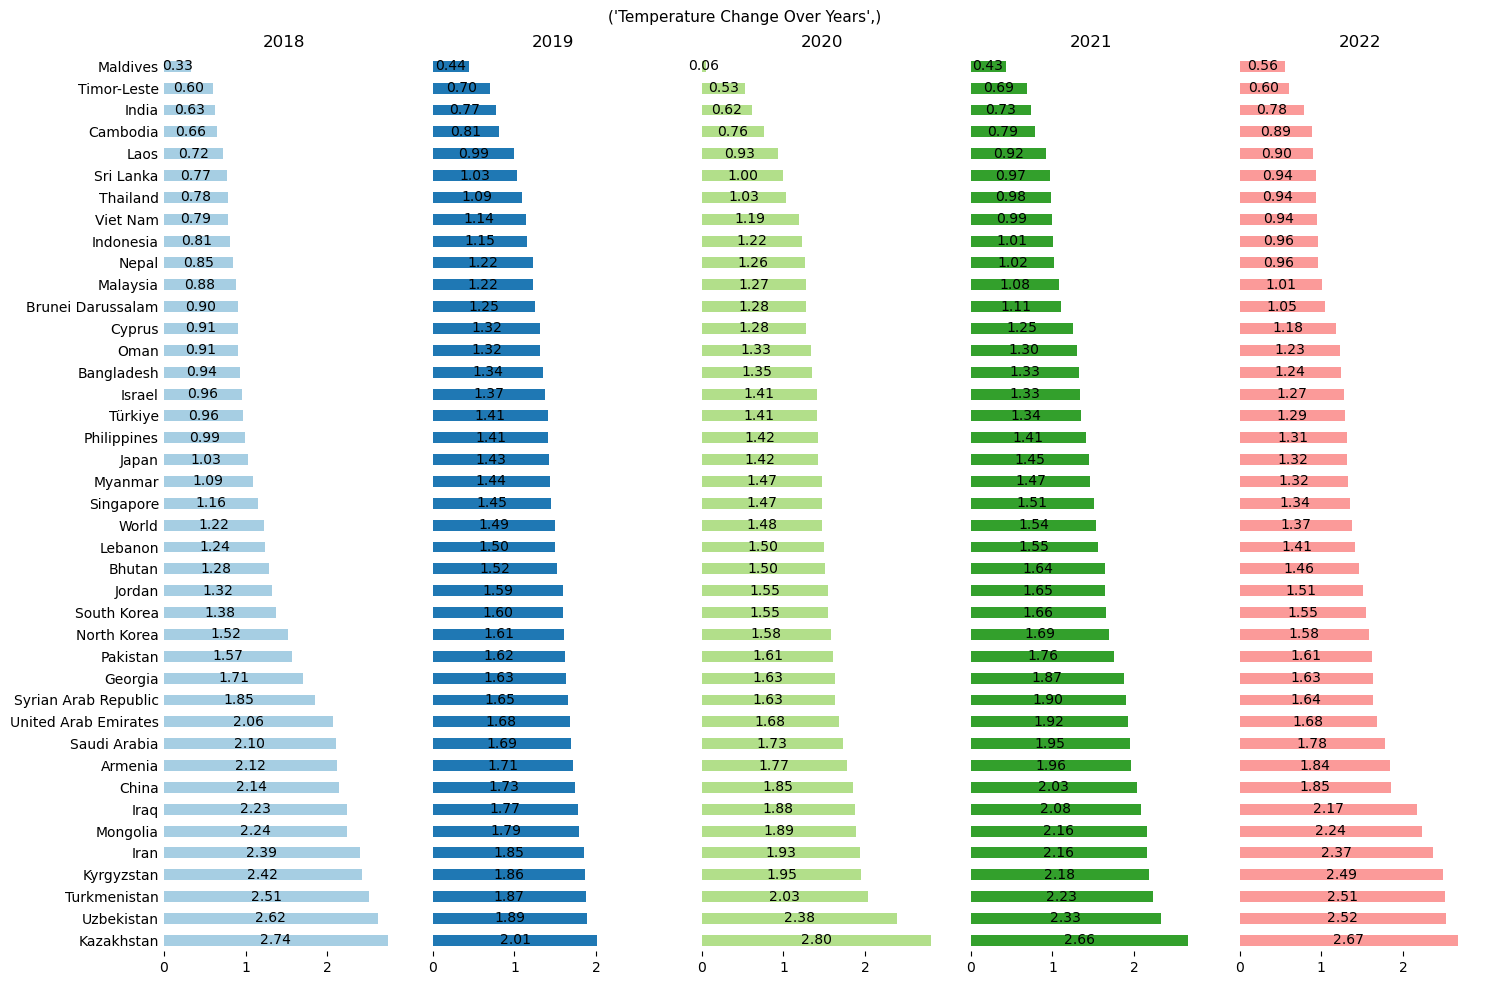

In [39]:
title="Temperature Change Over Years",
visualize_change_panel_bar_plot(ast, title)

Lấy Top3 nước có sự thay đổi nhiệt độ lớn nhất trong khu vực theo các năm

In [40]:
top_k_countries_by_year(ast, k=3)

Top 3 countries for 2018:
Country: Armenia, Value: 2.739
Country: Türkiye, Value: 2.617
Country: Georgia, Value: 2.514
----------------------------------------
Top 3 countries for 2019:
Country: Laos, Value: 2.014
Country: North Korea, Value: 1.889
Country: Mongolia, Value: 1.871
----------------------------------------
Top 3 countries for 2020:
Country: Kazakhstan, Value: 2.800
Country: Mongolia, Value: 2.384
Country: Georgia, Value: 2.031
----------------------------------------
Top 3 countries for 2021:
Country: Iraq, Value: 2.661
Country: Syrian Arab Republic, Value: 2.327
Country: Saudi Arabia, Value: 2.227
----------------------------------------
Top 3 countries for 2022:
Country: Kazakhstan, Value: 2.665
Country: Uzbekistan, Value: 2.520
Country: Turkmenistan, Value: 2.508
----------------------------------------


In [41]:
bottom_k_countries_by_year(ast, k=3)

Bottom 3 countries for 2018:
Country: Timor-Leste, Value: 0.333
Country: Kazakhstan, Value: 0.605
Country: Nepal, Value: 0.630
----------------------------------------
Bottom 3 countries for 2019:
Country: Timor-Leste, Value: 0.443
Country: Nepal, Value: 0.699
Country: Pakistan, Value: 0.774
----------------------------------------
Bottom 3 countries for 2020:
Country: Nepal, Value: 0.059
Country: India, Value: 0.529
Country: Pakistan, Value: 0.618
----------------------------------------
Bottom 3 countries for 2021:
Country: Nepal, Value: 0.428
Country: Timor-Leste, Value: 0.693
Country: India, Value: 0.734
----------------------------------------
Bottom 3 countries for 2022:
Country: Maldives, Value: 0.559
Country: Timor-Leste, Value: 0.601
Country: India, Value: 0.784
----------------------------------------


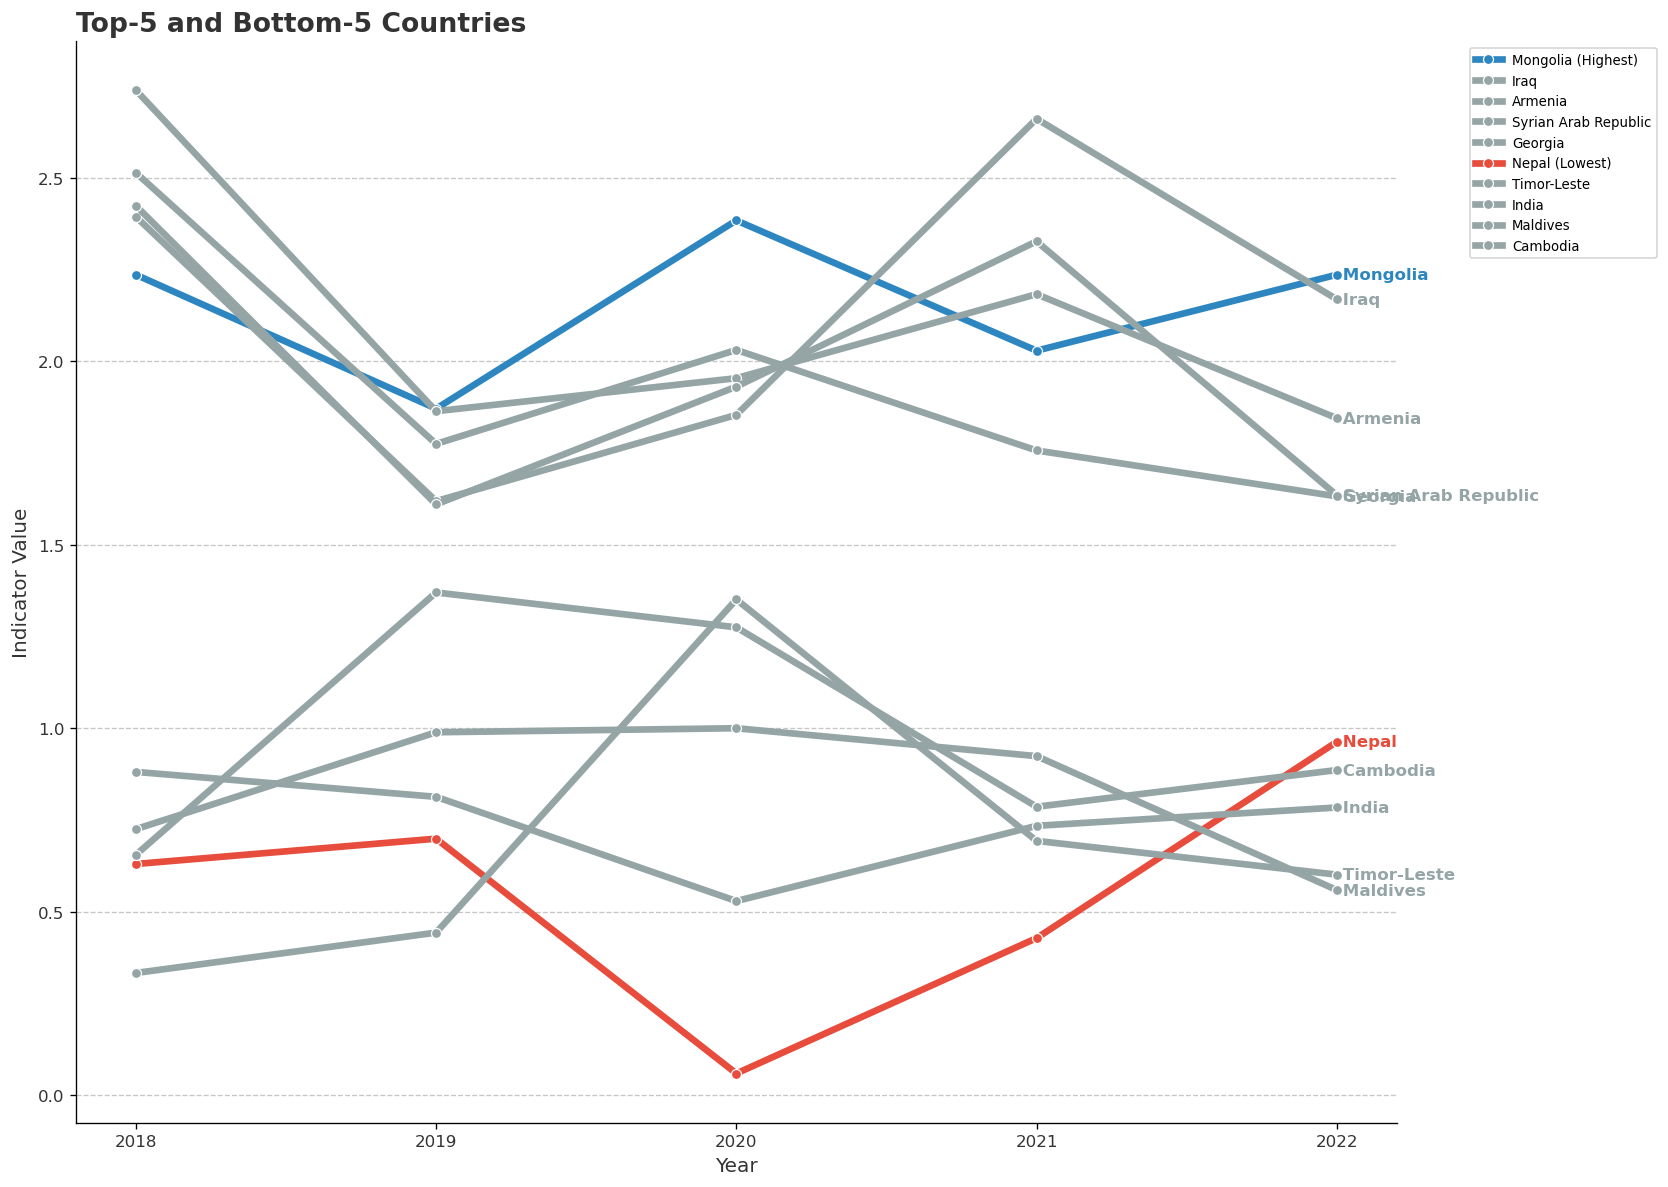

In [42]:
visualize_top_bottom_k_line_plot(ast, 5)

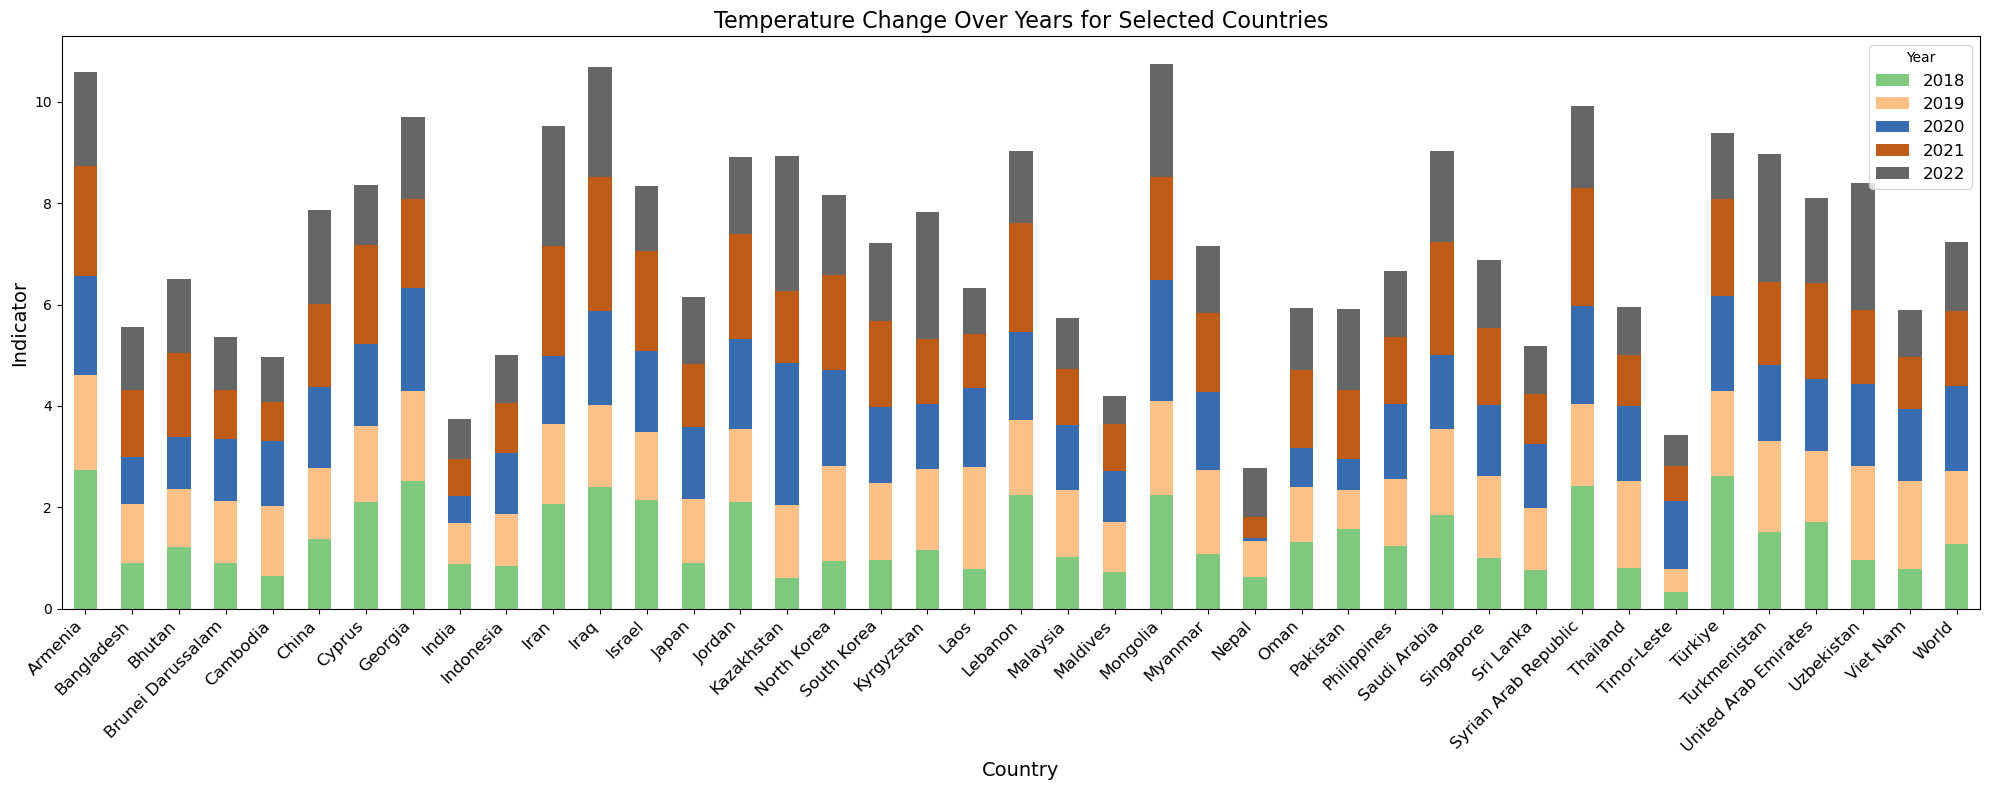

In [43]:
title = "Temperature Change Over Years for Selected Countries"
visualize_change_stacked_bar_plot(ast, title)